In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


# 读取数据
root_dir = os.getcwd()

# //拼接路径
OUTPUT_CSV = os.path.join(root_dir, "output", "investment_analysis.csv")
df = pd.read_csv(OUTPUT_CSV)

# 确保“支出类别”只有两类：“投资于物”、“投资于人”
# 若原始为关键词，需先映射（此处假设已映射好）

# 转换年份为整数
df['年份'] = df['年份'].astype(int)

# 按区域、年份、支出类别汇总金额
agg_df = df.groupby(['区域', '年份', '支出类别'])['金额（万元）'].sum().reset_index()

d:\set-up\anaconda\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
d:\set-up\anaconda\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
d:\set-up\anaconda\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


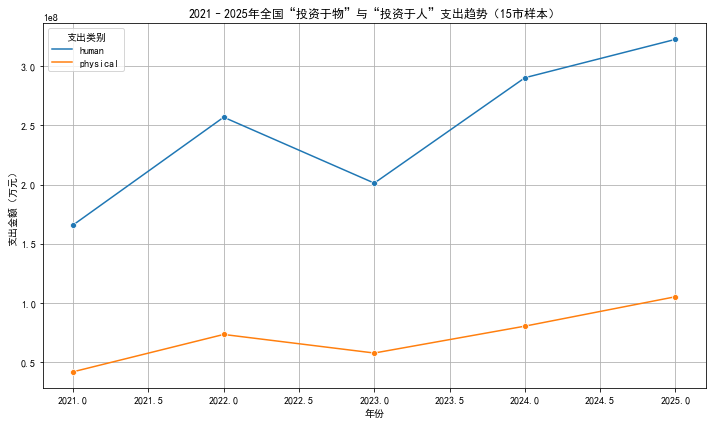

In [3]:
plt.rcParams['font.sans-serif'] = [
    'PingFang SC',
    'Heiti SC',
    'SimHei',
    'Arial Unicode MS'
]
 
# 全国汇总（不分区域）
national_trend = df.groupby(['年份', '支出类别'])['金额（万元）'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=national_trend, x='年份', y='金额（万元）', hue='支出类别', marker='o')
plt.title('2021–2025年全国“投资于物”与“投资于人”支出趋势（15市样本）')
plt.ylabel('支出金额（万元）')
plt.grid(True)
plt.tight_layout()
plt.savefig('national_trend.png', dpi=300)
plt.show()

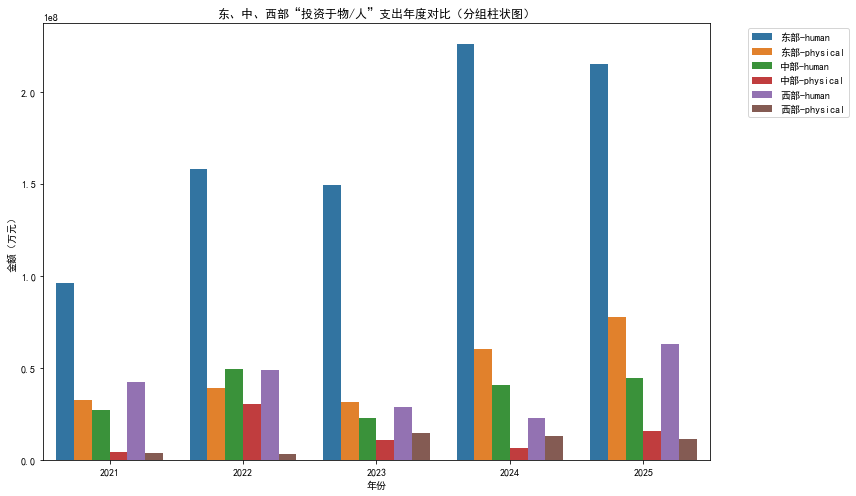

In [5]:
# 宽格式转长格式便于seaborn绘图
bar_data = agg_df.copy()
bar_data['区域-类别'] = bar_data['区域'] + '-' + bar_data['支出类别']

plt.figure(figsize=(12, 7))
sns.barplot(data=bar_data, x='年份', y='金额（万元）', hue='区域-类别')
plt.title('东、中、西部“投资于物/人”支出年度对比（分组柱状图）')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('grouped_bar.png', dpi=300)
plt.show()

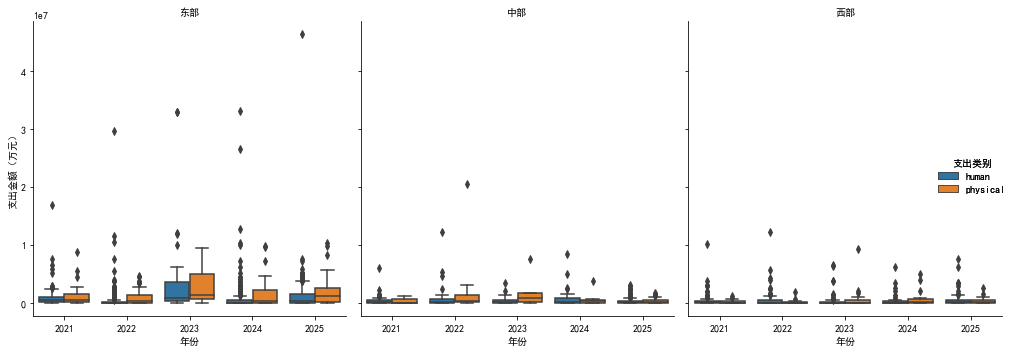

In [10]:

# 
# 替代方案：使用 catplot 实现分面箱线图
g = sns.catplot(
    data=box_df,
    x='年份',
    y='金额（万元）',
    hue='支出类别',
    col='区域',          # 按区域分面（东、中、西各一个子图）
    kind='box',
    height=5,
    aspect=0.8,
    sharey=True
)
g.set_axis_labels("年份", "支出金额（万元）")
g.set_titles("{col_name}")
g.add_legend(title="支出类别")
plt.tight_layout()
plt.savefig('boxplot_by_region.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
#    
# 安全筛选
human_df = df[df['支出类别'].str.contains('投资于人', na=False)]  # 更鲁棒

if human_df.empty:
    print("警告：未找到任何‘投资于人’的支出记录！")
else:
    heatmap_data = human_df.groupby(['城市', '年份'])['金额（万元）'].sum().unstack(fill_value=0)
    
    # 检查结果
    print("Heatmap data shape:", heatmap_data.shape)
    print("Heatmap data sample:\n", heatmap_data.head())

    if heatmap_data.size == 0:
        print("警告：heatmap_data 为空，无法绘图。")
    else:
        plt.figure(figsize=(10, 8))
        sns.heatmap(
            heatmap_data,
            annot=True,
            fmt='.0f',
            cmap='YlGnBu',
            cbar_kws={'label': '金额（万元）'},
            square=False
        )
        plt.title('各城市“投资于人”支出热力图（2021–2025）')
        plt.ylabel('城市')
        plt.xlabel('年份')
        plt.tight_layout()
        plt.savefig('heatmap_human.png', dpi=300, bbox_inches='tight')
        plt.show()

ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 720x576 with 0 Axes>